#### COMPANION WORKBOOK

# 1) Introduction

## Capstone Project - Census Income - Classification

#### About Data
 This data was extracted from the census bureau database found at http://www.census.gov/ftp/pub/DES/www/welcome.html.
 - Donor: Ronny Kohavi and Barry Becker, Data Mining and Visualization Silicon Graphics.
 - e-mail: ronnyk@sgi.com for questions.
 - Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

#### <span style="color:#555">Prediction Task</span>
- The Census Income dataset contains 13 independant variables for use in predicting whether final income is above or below $50,000 USD

#### The variables are as follows:

<b>Age</b>- A continuous numerical variable representing the age of the individual surveyed.

<b>Workclass</b>- Factors of the following options, “Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.”

<b>Fnlwgt</b>- Final weight, a continuous numerical variable describing a Census-specific value for how many other individuals this entry represents in the population. This value will likely be meaningless for predicting income, and it shows no relationship with other variables.

<b>Education</b>- Factors of the following options, “Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.” This represents the final level of the individual’s education at the time of the survey.

<b>Education-num</b>- A continuous numerical variable describing how many years of education the individual has had.

<b>Marital-status</b>- Factors of the following options, “Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.”

<b>Occupation</b>- Factors of the following options, “Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.”

<b>Relationship</b>- Factors of the following options, “Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.”

<b>Race</b>- Factors of the following options, “White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.”

<b>Sex</b>- Factors of the following options, “Female, Male.”

<b>Capital-gain</b>- A continuous numerical variable describing investment income which is not from wage or salary.

<b>Capital-loss</b>- A continuous numerical variable describing investment depreciation which is not from wage or salary.

<b>Hours-per-week</b>- A continuous numerical variable describing how many hours the individual currently works per week.

<b>Native-country</b>- Factors of the following options, “United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.”

# 2) Library Imports

In [95]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns',100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# Pickle for saving model files
import pickle

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# StandardScaler
from sklearn.preprocessing import StandardScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# 3) Exploratory Analysis

--------------------------------------------------------------------------------------------------------------------------------
## a) Basic Information
--------------------------------------------------------------------------------------------------------------------------------

In [96]:
# get the dataframe of our census income dataset and display first 5 records
df = pd.read_csv('census_income_dataset.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [97]:
# How many observations do we have?
# -- 32561
# How many features do we have?
# -- 15
# Is one of those features technically a target variable?
# -- Yes, class is the target variable
df.shape

(32561, 15)

In [98]:
# get the high level stats on our dataset
df.describe()
# there is no null value in below numerical features

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [99]:
# Look at the basic information
## get first 10 and check all the columns names and its data make sense
df.head(10)
## education-num (this can be numeric feature of education)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [100]:
## get last 10 and check all the columns names and its data is corrupt
df.tail(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [101]:
# check the datatypes of each field
df.dtypes
# there are 9 catagorical including predicted field(class) and 6 Numeric features

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

--------------------------------------------------------------------------------------------------------------------------------
## b) Distribution of Numerical features
--------------------------------------------------------------------------------------------------------------------------------

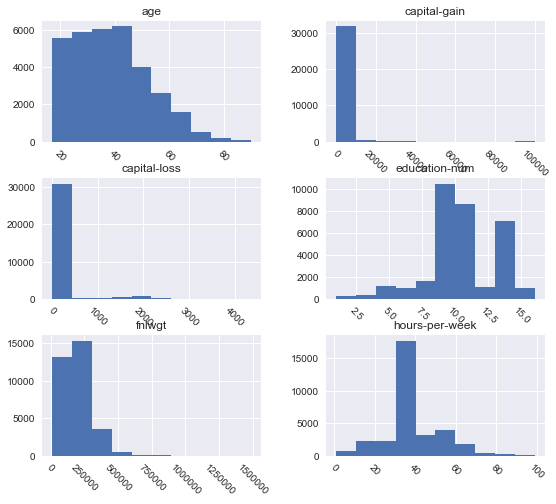

In [102]:
df.hist(figsize=(9,8), xrot=-45)
plt.show()
# observations
# our data set if of mostly in age < 60
# capital loss and capital gain needto check in segmentation
# check hours per week boundries

In [103]:
# check the numerical feature
df.describe()
# there are some observations which need to take care 
## - Max age = 90
## - education-num = 16
## - hours-per-week = 99
## No missing values, will check is missing values marked with something else

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


--------------------------------------------------------------------------------------------------------------------------------
### c) Distribution of Categorical features
--------------------------------------------------------------------------------------------------------------------------------

In [104]:
# check the catagorical feature
df.describe(include=['object'])
## - no nulls
## - our target variable <=50k has covered around 75%-80% dataset
## - native country has 42 unique values

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


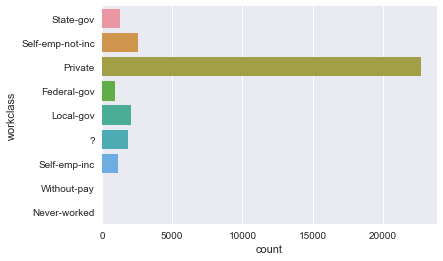

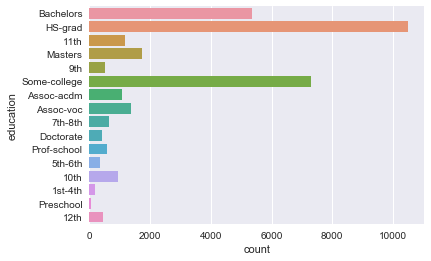

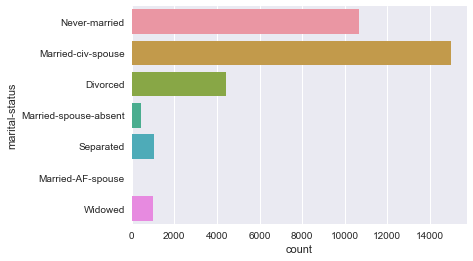

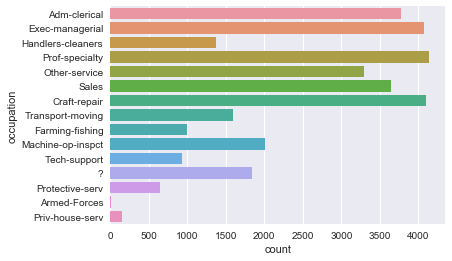

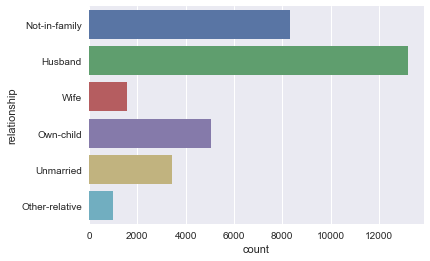

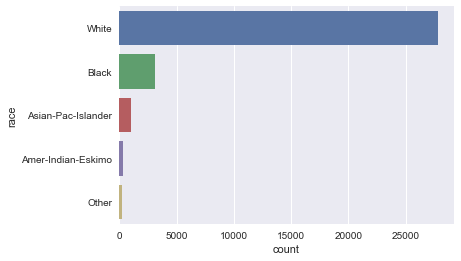

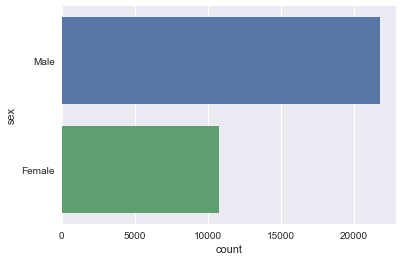

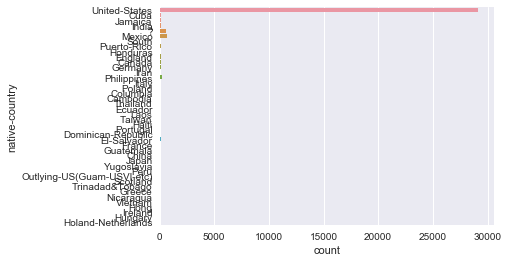

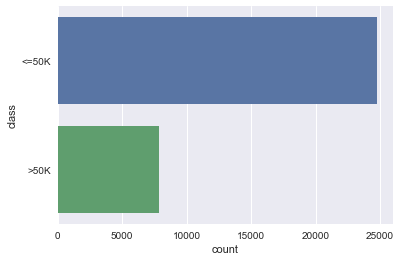

In [105]:
# lets plot some catogorical features and check their values
for col in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=col, data=df)
    plt.show()
# Observations
## - workclass - ?, without-pay & Never-Worked are sparce classes
## - education - Has so many classes which can be combined based on the education
## - marital status - ok
## - occupation - ?, Armed-Forces is sparce class
## - relationship - ok
## - race - ok
## - sex - we can convert sex as numeric feature
## - Native country - so many countries, majority is United States, will check if we can combine based on region.

--------------------------------------------------------------------------------------------------------------------------------
## d) Segmentation 
--------------------------------------------------------------------------------------------------------------------------------

In [106]:
# print all numeric features
df.dtypes[df.dtypes!='object']

age               int64
fnlwgt            int64
education-num     int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
dtype: object

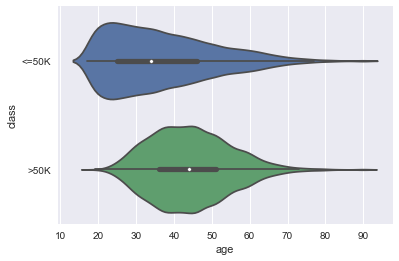

In [107]:
# our target variable is categorical will check it with other variables by using violen plot
# 1. with age
sns.violinplot(y='class', x='age', data=df)
plt.show()
# Observations
# - most of >=50k lies under age of 30-50
# - most of <=50 are under 15 - 30

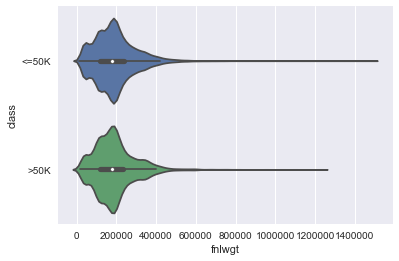

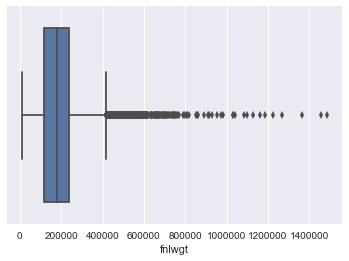

In [108]:
# 2. with fnlwgt
sns.violinplot(y='class', x='fnlwgt', data=df)
plt.show()
# Observations
# i am not sure about this column as this is not related to predict our income, we can remove it
# but there are some outliers
sns.boxplot(x='fnlwgt', data=df)
plt.show()

In [109]:
# check those outliers records > 600k
print(df[df.fnlwgt >= 600000]['fnlwgt'].count())
# there are around 142 observations
df[df.fnlwgt >= 600000]

142


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
182,30,Private,633742,Some-college,10,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,45,United-States,<=50K
215,37,Private,635913,Bachelors,13,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,60,United-States,>50K
312,19,?,860348,Some-college,10,Never-married,?,Own-child,Black,Female,0,0,25,United-States,<=50K
414,31,State-gov,1033222,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
827,39,Private,680390,HS-grad,9,Separated,Machine-op-inspct,Unmarried,White,Female,0,0,24,United-States,<=50K
1012,50,Private,767403,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,40,United-States,>50K
1291,63,Self-emp-not-inc,795830,1st-4th,2,Widowed,Other-service,Unmarried,White,Female,0,0,30,El-Salvador,<=50K
1597,37,Private,910398,Bachelors,13,Never-married,Sales,Not-in-family,Black,Female,0,0,40,United-States,<=50K
1971,31,?,672412,11th,7,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,<=50K
2347,18,Private,675421,9th,5,Never-married,Handlers-cleaners,Own-child,White,Male,594,0,40,United-States,<=50K


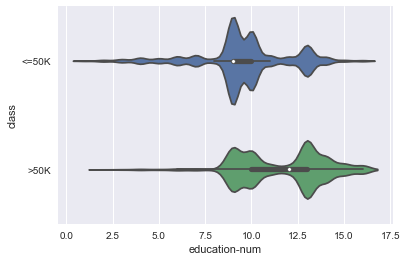

In [110]:
#  with education-num
sns.violinplot(y='class', x='education-num', data=df)
plt.show()
# some outliers where ">50k" < 7 and "<=50k" < 2


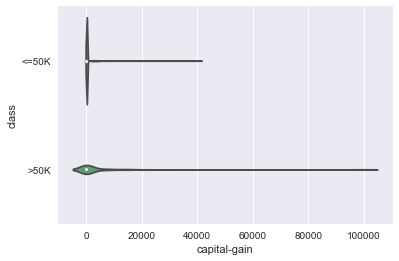

In [111]:
#  with capital-gain
#capital-gain      int64
sns.violinplot(y='class', x='capital-gain', data=df)
plt.show()
# very huge outliers

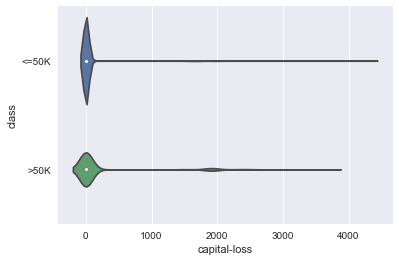

In [112]:
#  with capital-loss
#capital-loss      int64
sns.violinplot(y='class', x='capital-loss', data=df)
plt.show()
# very huge outliers

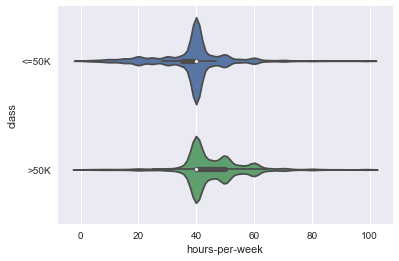

In [113]:
#  with hours-per-week
sns.violinplot(y='class', x='hours-per-week', data=df)
plt.show()
# some outliers where hours per week > 80

In [114]:
# detailed stats of class
df.groupby('class').mean()
# average hours per week is 45 for >50k and 38 for <=50k
# average education-num is 11.5 for >50k and 9.5 for <=50k

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
class,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


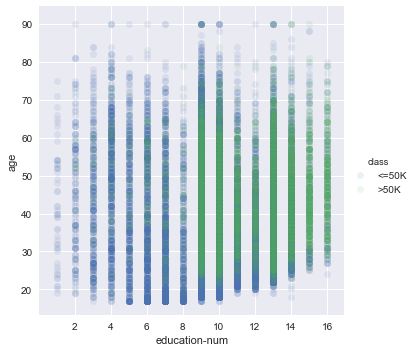

In [115]:
# more segmentation
# Education and age is the important factor of predicting the class of income
df.dtypes
# class with age and education
sns.lmplot(y='age', x='education-num', hue='class', data=df, scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()
# <=50k are mostly < 9 education level

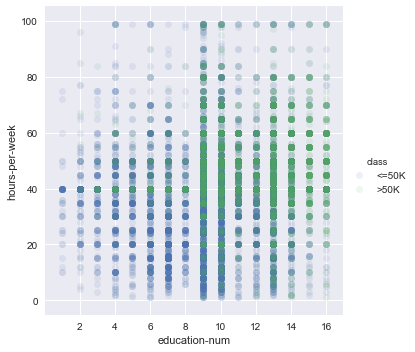

In [116]:
# more segmentation
df.dtypes
# class with hours-per-week and education-num
# will check whether hours per week will impact our calss prediction
sns.lmplot(y='hours-per-week', x='education-num', hue='class', data=df, scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()
# <=50k are mostly <= 9 education level whcih we already see in last segmentation 
# and hours per week mostly 40 till 60

In [117]:
# we can create one numeric feature for our correlation
# convert sex into numeric feature
df_copy = df.copy()
df_copy.sex.unique()
df_copy['sex_num'] = df_copy.sex
df_copy.sex_num.replace('Male',1, inplace=True)
df_copy.sex_num.replace('Female',2, inplace=True)
df_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,sex_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,2


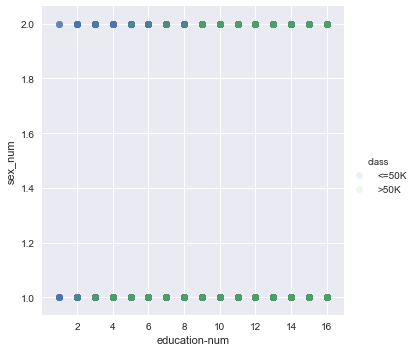

In [118]:
# more segmentation
df.dtypes
# class with sex and education-num
# check whether sex feature matters with education
sns.lmplot(y='sex_num', x='education-num', hue='class', data=df_copy, scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()
# mostly females education level > 8 for ">50k" income

In [119]:
# convert our target variable into numeric to underatand its correlation with other features
df_copy['class'] = pd.get_dummies(df_copy['class'])['>50K']

--------------------------------------------------------------------------------------------------------------------------------
### e) Correlation
--------------------------------------------------------------------------------------------------------------------------------

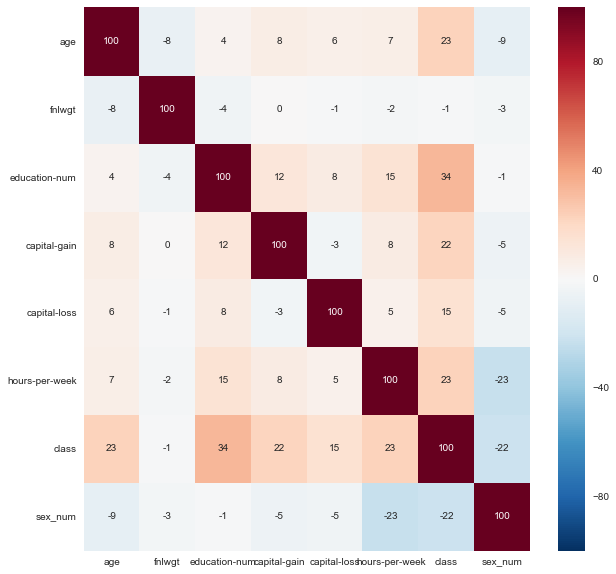

In [120]:
# Check the correlation between numeric features
df_copy.head()
corr = df_copy.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr*100, fmt= '.0f' , cmap='RdBu_r', annot=True)
plt.show()
# Class has +ve correlation with "age", "education-num" & "hours-per-week"

--------------------------------------------------------------------------------------------------------------------------------
# 4) Data Cleaning
--------------------------------------------------------------------------------------------------------------------------------

## a) Unwanted Observations

In [121]:
# get the dataset
df = pd.read_csv('census_income_dataset.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [122]:
# drop unwanted observations
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)
# there are 24 duplicates

(32561, 15)
(32537, 15)


## b) Structural Errors & Missing Data

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


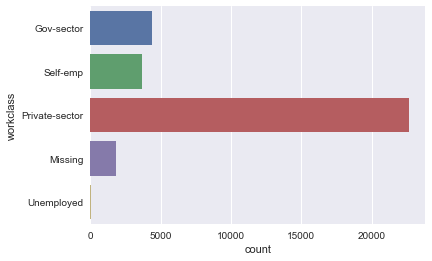

In [123]:
# clean workclass
print(df.workclass.unique())
# take all gov together
df.workclass.replace(['State-gov', 'Federal-gov', 'Local-gov'], 'Gov-sector', inplace=True)
# fill ? with missing
df.workclass.replace('?', 'Missing', inplace=True)
# without-pay, never-worked, as Unemployed
df.workclass.replace(['Without-pay', 'Never-worked'], 'Unemployed', inplace=True)
# put self employed together
df.workclass.replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self-emp', inplace=True)
# rename Private to private sector
df.workclass.replace('Private', 'Private-sector', inplace=True)
sns.countplot(y='workclass', data=df)

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


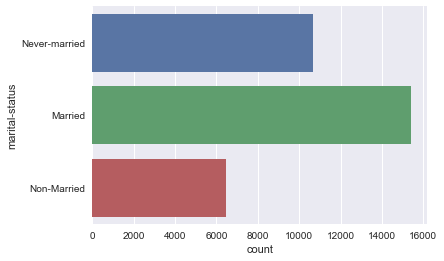

In [124]:
# clean marital-status
print(df['marital-status'].unique())
# create married, combine (Married-civ-spouse, Married-spouse-absent, Married-AF-spouse)
df['marital-status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married', inplace=True)
# create non-married combine(Divorced, Separated, Widowed)
df['marital-status'].replace(['Divorced', 'Separated', 'Widowed'], 'Non-Married', inplace=True)
sns.countplot(y='marital-status', data=df)

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


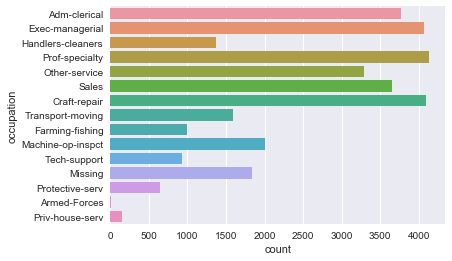

In [125]:
# clean occupation
print(df['occupation'].unique())
# fill? with missing
df.occupation.replace('?', 'Missing', inplace=True)
sns.countplot(y='occupation', data=df)

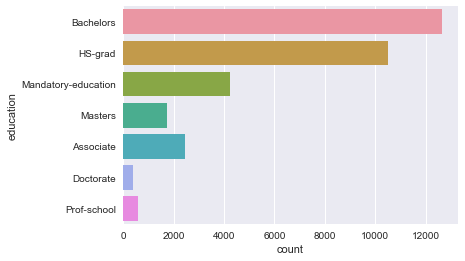

In [126]:
# clean education
df['education'].unique()
# combine 'Bachelors', 'Some-college' to 'Bachelors'
df.education.replace(['Bachelors', 'Some-college'], 'Bachelors', inplace=True)
# combine '11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', '12th','preschool' to 'Mandatory-education'
m_edu = ['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', '12th','Preschool']
df.education.replace(m_edu, 'Mandatory-education', inplace=True)
# combine 'Assoc-acdm', 'Assoc-voc' to 'Associate'
df.education.replace(['Assoc-acdm', 'Assoc-voc'], 'Associate', inplace=True)

sns.countplot(y='education', data=df)

['North-America' 'Latin-South-America' 'Asia' 'Missing' 'Others' 'Europe']


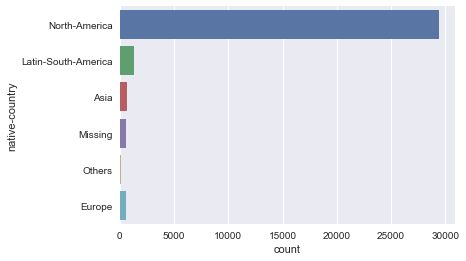

In [127]:
# clean native-country
# we can group countries with continent/region
Asia = ['China','Hong','India','Iran','Cambodia','Japan', 'Laos','Philippines' ,'Vietnam' ,'Taiwan', 'Thailand']
North_America = ['Canada','United-States','Puerto-Rico']

Europe = ['England' ,'France', 'Germany' ,'Greece','Holand-Netherlands','Hungary',
          'Ireland','Italy','Poland','Portugal','Scotland','Yugoslavia']

Latin_South_America = ['Columbia','Cuba','Dominican-Republic','Ecuador','El-Salvador','Guatemala','Haiti','Honduras',
                           'Mexico','Nicaragua','Outlying-US(Guam-USVI-etc)','Peru','Jamaica','Trinadad&Tobago']

df['native-country'].replace(Asia, 'Asia',inplace = True)
df['native-country'].replace(North_America, 'North-America',inplace = True)
df['native-country'].replace(Europe, 'Europe',inplace = True)
df['native-country'].replace(Latin_South_America, 'Latin-South-America',inplace = True)
df['native-country'].replace('?', 'Missing',inplace = True)
df['native-country'].replace('South', 'Others',inplace = True)

print(df['native-country'].unique())
sns.countplot(y='native-country', data=df)
plt.show()

## c) Outliers

In [128]:
# remove unwanted column fnlwgt
# This value will likely be meaningless for predicting income, and it shows no relationship with other variables.
df = df.drop('fnlwgt', axis=1)
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,Gov-sector,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North-America,<=50K
1,50,Self-emp,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,North-America,<=50K
2,38,Private-sector,HS-grad,9,Non-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North-America,<=50K
3,53,Private-sector,Mandatory-education,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,North-America,<=50K
4,28,Private-sector,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Latin-South-America,<=50K


In [129]:
# store our cleaned dataset
df.to_csv('census_income_cleaned_date.csv', index=None)

# 5) Feature Engineering

In [130]:
# get cleaned dataset
df = pd.read_csv('census_income_cleaned_date.csv')

In [131]:
# check any Null in categorical features
df.select_dtypes(include=['object']).isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
class             0
dtype: int64

In [132]:
# check any Null in numeric features
df.select_dtypes(exclude=['object']).isnull().sum()

age               0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

## a) Domain Knowledge & Heuristics

In [133]:
# As we converted all our country based on region so, rename native-country to region
df = df.rename(columns={'native-country':'region'})

In [134]:
# I tried this to improve our score but it did not worked

# create a feature 'Education-level' based on eductaion
# Divide into 3 classes - under-educated, Educated, and highly-educated
#df['Under-educated'] = (df['education-num'] <= 8).astype('int')
#df['educated'] = ((df['education-num'] > 8) & (df['education-num'] <=13)).astype('int')
#df['Highly-educated'] = (df['education-num'] > 13).astype('int')

In [135]:
# I tried this to improve our score but it did not worked

# create a new feature called Workaholic - who work more than 55 hrs per week
#df['hours-per-week'].describe()
#df['Workaholic'] = (df['hours-per-week'] > 55).astype('int')

In [136]:
# I tried this to improve our score and it worked,
# as we saw in our segmentaion Age and education is correlated with class variable, 
# so we created one feature where elders i.e. > 25 years and are educated are earning >50k

# educated elders
df['elder-educated'] = ((df['education-num'] >= 9) & (df['age'] >=25)).astype('int')

In [137]:
# convert sex into numeric feature and drop sex column
df['sex_num'] = df.sex
df.sex_num.replace('Male',1, inplace=True)
df.sex_num.replace('Female',2, inplace=True)
df.drop('sex', axis=1, inplace=True)

In [138]:
# convert class into numeric variable
# +ve class - >50k
# -ve class - <=50k
df['class'] = pd.get_dummies(df['class'])['>50K']

In [139]:
# as we saw in our dataset not everyone has capital gain and capital loss and its correlated with class variable, 
# so se create one feature based on that our model know it has capital gain or loss

# create extra feature which shows no capital-gain and capital-loss
df['No-capital-gain-loss'] = ((df['capital-gain'] == 0) & (df['capital-loss'] == 0)).astype('int')

## b) Prepare ABT

In [140]:
# convert all catogorical features into Numeric
list_objects = list(df.dtypes[df.dtypes == 'object'].index)

df = pd.get_dummies(df, columns=list_objects)

In [141]:
# prepare Abstract Base table after creating all features
df.to_csv('census_income_abt.csv', index=None)

# 6) Algorithm Selection

In [142]:
# Algorithms
# As this is a binar classification problem and we need to predict income >50k or <= 50k.
# we choose below algorithms:
# - L1 Logistic Regression
# - L2 Logistic Regression
# - Random forest classifier
# - Gradient Boosted classifier

# We need to tune Hyperparameters and fit our model with the training dataset to get the best model

# 7) Model Training

## a) Data Spending

In [167]:
# getting ABT dataset
df = pd.read_csv('census_income_abt.csv')
print(df.shape)
df.head()


(32537, 56)


,age,education-num,capital-gain,capital-loss,hours-per-week,class,elder-educated,sex_num,No-capital-gain-loss,workclass_Gov-sector,workclass_Missing,workclass_Private-sector,workclass_Self-emp,workclass_Unemployed,education_Associate,education_Bachelors,education_Doctorate,education_HS-grad,education_Mandatory-education,education_Masters,education_Prof-school,marital-status_Married,marital-status_Never-married,marital-status_Non-Married,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Missing,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,region_Asia,region_Europe,region_Latin-South-America,region_Missing,region_North-America,region_Others
0,39,13,2174,0,40,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,50,13,0,0,13,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,38,9,0,0,40,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,53,7,0,0,40,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,28,13,0,0,40,0,1,2,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [144]:
# Split Dataset
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = df['class'], random_state = 1234)
print(len(X_train), len(X_test), len(y_train), len(y_test))

26029 6508 26029 6508


## b) Pre-Processing & Pipelines

In [145]:
# Build model pipelines
l1 = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=123))
l2 = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=123))
rf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123))
gb = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
pipelines = {'l1':l1, 'l2':l2, 'rf':rf, 'gb':gb}

## c) Hyperparameter Tuning

In [146]:
# Declare Hyperparameter Grids
l1_hyperparameters = {'logisticregression__C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}
l2_hyperparameters = {'logisticregression__C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto','sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf': [1,3,5,10]
} 
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1,3,5]
} 
hyperparameters = {
    'l1': l1_hyperparameters,
    'l2': l2_hyperparameters, 
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}

## d) Winner Selection

In [147]:
# Fit and Tune Models with Cross-Validation
fitted_model = {}
for name, pipeline in pipelines.items():
    print("Fiting Model", name)
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    
    fitted_model[name] = model
    print("Model {} fitted".format(name))

Fiting Model l1
Model l1 fitted
Fiting Model l2
Model l2 fitted
Fiting Model rf
Model rf fitted
Fiting Model gb
Model gb fitted


---------------l1----------------
Best Score:  0.853663221791
Confusion Metrix : 
[[4624  316]
 [ 648  920]]
ROC Score:  0.909638299905


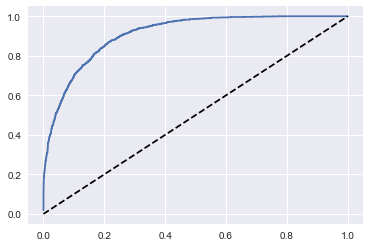

---------------l2----------------
Best Score:  0.853624803104
Confusion Metrix : 
[[4624  316]
 [ 648  920]]
ROC Score:  0.90964126921


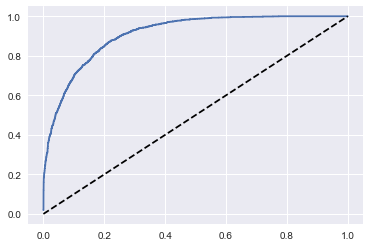

---------------rf----------------
Best Score:  0.865035153098
Confusion Metrix : 
[[4655  285]
 [ 621  947]]
ROC Score:  0.916210663162


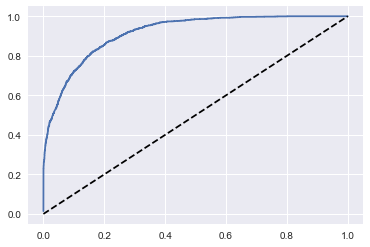

---------------gb----------------
Best Score:  0.871220561681
Confusion Metrix : 
[[4644  296]
 [ 554 1014]]
ROC Score:  0.928258876931


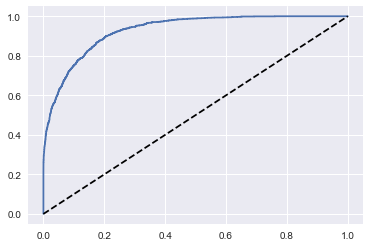

In [148]:
# Getting the best scores, confusion metrics and AUROC review to select the best model
for name, model in fitted_model.items():
    print("---------------{0}----------------".format(name))
    print("Best Score: ", model.best_score_)
    pred_class = fitted_model[name].predict(X_test)
    pred = fitted_model[name].predict_proba(X_test)
    pred = [p[1] for p in pred]
    cm = confusion_matrix(y_test, pred_class)
    print("Confusion Metrix : ")
    print(cm)
    fpr, tpr, threshold = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label=name)
    plt.plot([0,1], [0,1], 'k--')
    print("ROC Score: ", roc_auc_score(y_test, pred))
    plt.show()

In [149]:
# pick the winning model and save
# ----- gb is the winner ----
# Best score - 0.871220561681
# ROC Score - 0.928258876931
# confusion metrics - 
#      [[4644  296]
#       [ 554 1014]]
with open('census_income_final_model.pkl', 'wb') as f:
    pickle.dump(fitted_model['gb'].best_estimator_,f)

# 8) Insights & Analysis 

In [153]:
# Key findings and learning
# This dataset is really useful to get insights of numerical as well as categorical features
# This dataset has more categorial features then Numeric and that would really help to understand and give more experience  
# how to deal with categorical features.
# I tried to improve the roc score to create features based on segmtations and it worked, i have improved my precentage by 1.5%

# Winning model
# My winning model is Gradient Boosting which gives me best score as well as roc score

# The score also be improved more on tuning the dataset in data cleaning and create more into deep feature engineering.
# may be other algorithms then Random forest and Gradient Boost give more accurate score

# I have one additional Unseen dataset which has predicted value as well.
# will run our model into unseen dataset and check the accuracy in next section

# I took help from our cornerstone projects (Real state as well as Chief people officer)

# 9) Check our model with Unseen data

In [155]:
# get our final model and print
with open('census_income_final_model.pkl', 'rb') as f:
    model = pickle.load(f)
print(model)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
   ...s=200, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False))])


In [163]:
# create function of our cleaned dataset
def clean_data(df):
    # drop duplicates
    df.drop_duplicates(inplace=True)
    # clean workclass
    # take all gov together
    df.workclass.replace(['State-gov', 'Federal-gov', 'Local-gov'], 'Gov-sector', inplace=True)
    # fill ? with missing
    df.workclass.replace('?', 'Missing', inplace=True)
    # without-pay, never-worked, as Unemployed
    df.workclass.replace(['Without-pay', 'Never-worked'], 'Unemployed', inplace=True)
    # put self employed together
    df.workclass.replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self-emp', inplace=True)
    # rename Private to private sector
    df.workclass.replace('Private', 'Private-sector', inplace=True)

    # clean marital-status
    # create married, combine (Married-civ-spouse, Married-spouse-absent, Married-AF-spouse)
    df['marital-status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married', inplace=True)
    # create non-married combine(Divorced, Separated, Widowed)
    df['marital-status'].replace(['Divorced', 'Separated', 'Widowed'], 'Non-Married', inplace=True)

    # clean occupation
    # fill? with missing
    df.occupation.replace('?', 'Missing', inplace=True)

    # clean education
    # combine 'Bachelors', 'Some-college' to 'Bachelors'
    df.education.replace(['Bachelors', 'Some-college'], 'Bachelors', inplace=True)
    # combine '11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', '12th','preschool' to 'Mandatory-education'
    m_edu = ['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', '12th','Preschool']
    df.education.replace(m_edu, 'Mandatory-education', inplace=True)
    # combine 'Assoc-acdm', 'Assoc-voc' to 'Associate'
    df.education.replace(['Assoc-acdm', 'Assoc-voc'], 'Associate', inplace=True)

    # clean native-country
    # we can group countries with continent/region
    Asia = ['China','Hong','India','Iran','Cambodia','Japan', 'Laos','Philippines' ,'Vietnam' ,'Taiwan', 'Thailand']
    North_America = ['Canada','United-States','Puerto-Rico']

    Europe = ['England' ,'France', 'Germany' ,'Greece','Holand-Netherlands','Hungary',
              'Ireland','Italy','Poland','Portugal','Scotland','Yugoslavia']

    Latin_South_America = ['Columbia','Cuba','Dominican-Republic','Ecuador','El-Salvador','Guatemala','Haiti','Honduras',
                               'Mexico','Nicaragua','Outlying-US(Guam-USVI-etc)','Peru','Jamaica','Trinadad&Tobago']

    df['native-country'].replace(Asia, 'Asia',inplace = True)
    df['native-country'].replace(North_America, 'North-America',inplace = True)
    df['native-country'].replace(Europe, 'Europe',inplace = True)
    df['native-country'].replace(Latin_South_America, 'Latin-South-America',inplace = True)
    df['native-country'].replace('?', 'Missing',inplace = True)
    df['native-country'].replace('South', 'Others',inplace = True)

    # remove unwanted column fnlwgt
    # This value will likely be meaningless for predicting income, and it shows no relationship with other variables.
    df = df.drop('fnlwgt', axis=1)
    
    return df

In [159]:
def engineer_features(df):
    # As we converted all our country based on region so, rename native-country to region
    df = df.rename(columns={'native-country':'region'})
    # educated elders
    df['elder-educated'] = ((df['education-num'] >= 9) & (df['age'] >=25)).astype('int')
    # convert sex into numeric feature and drop sex column
    df['sex_num'] = df.sex
    df.sex_num.replace('Male',1, inplace=True)
    df.sex_num.replace('Female',2, inplace=True)
    df.drop('sex', axis=1, inplace=True)
    # convert class into numeric variable
    # +ve class - >50k
    # -ve class - <=50k
    df['class'] = pd.get_dummies(df['class'])['>50K']
    # create extra feature which shows no capital-gain and capital-loss
    df['No-capital-gain-loss'] = ((df['capital-gain'] == 0) & (df['capital-loss'] == 0)).astype('int')
    # convert all catogorical features into Numeric
    list_objects = list(df.dtypes[df.dtypes == 'object'].index)

    df = pd.get_dummies(df, columns=list_objects)
    # Return augmented DataFrame
    return df

In [199]:
# get our unseen data
raw_data = pd.read_csv('census_income_test_dataset.csv')
print(raw_data.shape)
raw_data.head()

(16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [200]:
# get the cleaned data
cleaned_data_df = clean_data(raw_data) 
print(cleaned_data_df.shape)
cleaned_data_df.head()

(16276, 14)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private-sector,Mandatory-education,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,North-America,<=50K
1,38,Private-sector,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,North-America,<=50K
2,28,Gov-sector,Associate,12,Married,Protective-serv,Husband,White,Male,0,0,40,North-America,>50K
3,44,Private-sector,Bachelors,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,North-America,>50K
4,18,Missing,Bachelors,10,Never-married,Missing,Own-child,White,Female,0,0,30,North-America,<=50K


In [201]:
# get the ABT
augmented_data_df = engineer_features(cleaned_data_df)
print(augmented_data_df.shape)
augmented_data_df.head()

(16276, 56)


,age,education-num,capital-gain,capital-loss,hours-per-week,class,elder-educated,sex_num,No-capital-gain-loss,workclass_Gov-sector,workclass_Missing,workclass_Private-sector,workclass_Self-emp,workclass_Unemployed,education_Associate,education_Bachelors,education_Doctorate,education_HS-grad,education_Mandatory-education,education_Masters,education_Prof-school,marital-status_Married,marital-status_Never-married,marital-status_Non-Married,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Missing,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,region_Asia,region_Europe,region_Latin-South-America,region_Missing,region_North-America,region_Others
0,25,7,0,0,40,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,38,9,0,0,50,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,28,12,0,0,40,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,44,10,7688,0,40,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,18,10,0,0,30,0,0,2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [202]:
# get our feature and predicted 
X = augmented_data_df.drop('class', axis=1)
y = augmented_data_df['class']

# predict based on our GB model
pred_class = model.predict(X)
pred = model.predict_proba(X)
pred = [p[1] for p in pred]

In [203]:
# what is the roc_score on our unseen dataset
roc_score = roc_auc_score(y, pred)
roc_score
# 0.92645373634736217 is almost same as our model test data score 0.928258876931

0.92645373634736217

In [204]:
# add our prediction with our actual target variable and see
cleaned_data_df['predicted'] = pred
cleaned_data_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,predicted
0,25,Private-sector,Mandatory-education,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,North-America,<=50K,0.003483
1,38,Private-sector,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,North-America,<=50K,0.172458
2,28,Gov-sector,Associate,12,Married,Protective-serv,Husband,White,Male,0,0,40,North-America,>50K,0.332037
3,44,Private-sector,Bachelors,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,North-America,>50K,0.993894
4,18,Missing,Bachelors,10,Never-married,Missing,Own-child,White,Female,0,0,30,North-America,<=50K,0.001326


In [206]:
# store into a csv for further analysis and to improve our model
cleaned_data_df.to_csv('census_income_test_dataset_predicted.csv', index=None)